# PyTorch İş Akışı (Workflow)

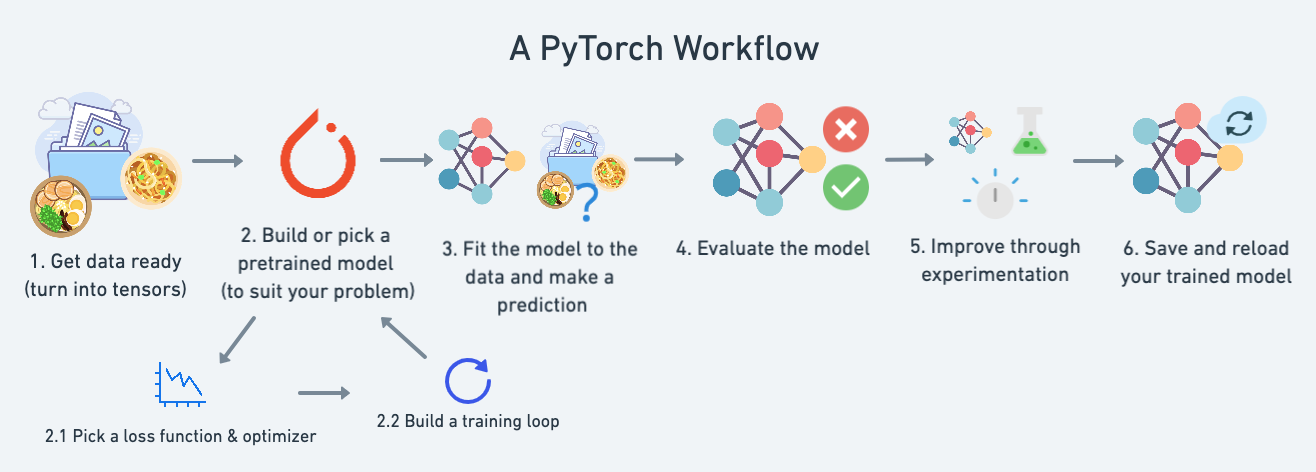

`1.Veriyi Hazırlama (Getting Data Ready) = `
Makine öğrenmesinde ham veriyi (resim, metin, sayı) doğrudan kullanamazsın.

- Tensörlere Dönüştürme: Veriyi bilgisayarın anlayabileceği sayısal matrislere, yani tensörlere çevirmen gerekir.

- Bu modülde başlangıç olarak basit bir "düz çizgi" verisi oluşturulacağı belirtiliyor.

`2.Model İnşa Etme (Building a Model) = `
Veri hazır olduktan sonra, bu verideki kalıpları öğrenecek bir yapı kurman gerekir.

- Model Seçimi: Sıfırdan bir model tasarlayabilir veya hazır (pretrained) bir modeli problemin için özelleştirebilirsin.

- Kritik Bileşenler: Burada bir kayıp fonksiyonu (loss function), bir optimizasyon algoritması (optimizer) seçilir ve eğitim döngüsü (training loop) kurulur.

`3.Modeli Veriye Uydurma / Eğitim (Fitting the Model) = `
Bu aşama modelin "öğrenmeye" başladığı yerdir. Model, eğitim verisindeki kalıpları (patterns) bulmaya çalışır. Tahminler yapar ve hatalarından ders çıkararak kendisini günceller.

`4.Tahmin Yapma ve Değerlendirme (Inference & Evaluation) = `
Model eğitildikten sonra, başarısını test etmek gerekir.

- Modelin daha önce hiç görmediği test verileri üzerinde tahmin yapması sağlanır (Inference).

- Bu tahminler gerçek verilerle karşılaştırılarak modelin ne kadar doğru çalıştığı ölçülür.

`5.Deneylerle İyileştirme (Improve Through Experimentation) = `
Eğer modelin başarısı düşükse, parametreleri değiştirerek veya farklı teknikler kullanarak sonuçları iyileştirmeye çalışırsın. Görselde bu aşama bir döngü olarak gösterilmiştir.

`6.Kaydetme ve Yeniden Yükleme (Save and Reload) = `
Eğittiğin modeli daha sonra kullanmak veya başka bir sisteme entegre etmek için dosyaya kaydedersin. Böylece her seferinde modeli baştan eğitmek zorunda kalmazsın.

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

>` import torch: `PyTorch'un kendisi; tensör işlemleri ve matematiksel hesaplamalar için ana kütüphanedir.

> `from torch import nn:` nn (neural networks), sinir ağlarını inşa etmek için kullanılan katmanları, aktivasyon fonksiyonlarını ve yapı taşlarını içerir.

>` import matplotlib.pyplot as plt:` Modelin tahminlerini ve verileri görselleştirmek için kullanılan grafik kütüphanesidir.


# 1. Data (preparing and loading)

`Bölüm 1 (Veriyi Sayılara Döndürmek):`Makine öğrenmesi algoritmaları resimleri, sesleri veya yazıları doğrudan "göremez". Bu yüzden her şeyin sayısal bir temsile (numerical encoding) dönüştürülmesi gerekir. Görselde yemek resimlerinin, ses dalgalarının ve sosyal medya metinlerinin nasıl sayılardan oluşan listelere (tensörlere) dönüştüğü gösteriliyor.

`Bölüm 2 (Kalıpları Öğrenmek):`Bu sayısal veriler bir modele (sinir ağına) verilir. Model, bu sayılar arasındaki ilişkileri ve ağırlıkları (weights) öğrenir.

`Çıktı (Outputs):`Model öğrendikten sonra yeni bir veri geldiğinde tahmin yapar. Örneğin; "Bu resim spagetti mi?", "Bu mesaj spam mi?" veya "Siri, bugün hava nasıl?" sorularına yanıt verir.

### Linear Regression

In [3]:
# Bilinen Parametreler
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02

X = torch.arange(start= start, end= end, step= step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))



- weight = 0.7

- bias = 0.3




   - Nedir? Bunlar bizim "gizli" sayılarımız. Matematikteki $y = mx + b$ formülündeki $m$ (eğim) ve $b$ (kayma) değerleridir.

   - Amaç: Biz bu sayıları şu an biliyoruz ama ileride oluşturacağımız PyTorch modeli bu sayıları bilmeyecek. Modelin görevi, verilere bakarak bu sayıların $0.7$ ve $0.3$ olduğunu tahmin etmek olacak.



- start = 0

-  end = 1

-  step = 0.02

-  X = torch.arange(start, end, step).unsqueeze(dim=1)

   - torch.arange: 0'dan 1'e kadar 0.02 adımlarla sayılar üretir ($0, 0.02, 0.04...$ gibi).

   - unsqueeze(dim=1): Bu çok kritiktir. PyTorch, verilerin belirli bir şekle (genellikle sütun şeklinde) sahip olmasını ister. Bu komut, yatay duran sayı dizisini dikey bir liste haline getirir.

   - Amaç: Modelin üzerine kuralı uygulayacağı ham maddeleri (girdileri) oluşturmak.





- y = weight * X + bias

   - Nedir? Her bir $X$ değerini $0.7$ ile çarpıp $0.3$ ekliyoruz.
   
   - Amaç: Modelin öğrenmesi gereken "doğru cevapları" (labels) oluşturmak. Yani elimizde artık bir soru ($X$) ve o sorunun doğru cevabı ($y$) var.

Yapay zekayı eğitmek için önce ona neyin doğru olduğunu göstermeniz gerekir.
- Girdiler ($X$): Bunlar modelin göreceği rakamlar.
- Kural ($0.7$ ve $0.3$): Evrenin gizli kuralı gibi düşün.
- Sonuçlar ($y$): Kural uygulandıktan sonra çıkan doğru cevaplar.

Senin şu anki konumun: Bir öğretmen gibi öğrencine (modele) çalışması için bir test hazırladın. Testin soruları $X$, cevap anahtarı ise $y$. Bir sonraki aşamada model, cevap anahtarına bakmadan $X$ ile $y$ arasındaki o "gizli" $0.7$ ve $0.3$ bağlantısını çözmeye çalışacak.

### Data Spling

Neden Veriyi Bölüyoruz?

Gerçek hayatta bir öğrenciyi düşün: Tüm dönem boyunca kitaptaki soruları çözer (Eğitim), sonra sınavda hiç görmediği sorularla karşılaşır (Test). Eğer sınavda kitaptaki soruların aynısı çıksaydı, öğrencinin konuyu anlayıp anlamadığını değil, sadece ezberleyip ezberlemediğini ölçmüş olurdun.

Görselde veri üç gruba ayrılmış:

`Eğitim Seti (Training Set):`Modelin üzerinde çalıştığı, kalıpları öğrendiği ders materyalleridir. Toplam verinin yaklaşık %60-80'idir.

`Doğrulama Seti (Validation Set):`Modelin ayarlarını (hiperparametrelerini) ince ayar yapmak için kullanılan "deneme sınavı" gibidir. Genelde %10-20 oranındadır.

`Test Seti (Testing Set):`Modelin gerçek başarısını ölçmek için kullanılan "final sınavı"dır. Model bu veriyi eğitim sırasında asla görmez. Genelde %10-20 oranındadır.

In [4]:
train_split = int(0.8 * len(X))
# Verinin %80'inin kaç adet örnek ettiğini hesaplıyor (50 örneğin 40 tanesi).

X_train, y_train = X[:train_split], y[:train_split]
# İlk 40 örneği eğitim için ayırıyor. Model sadece bu kısma bakarak 0.7 ve 0.3 değerlerini bulmaya çalışacak.

X_test, y_test = X[train_split:], y[train_split:]
# Geri kalan 10 örneği test için ayırıyor. Model eğitildikten sonra "Bakalım bu 10 örneği doğru tahmin edebilecek mi?" diyeceğiz.

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

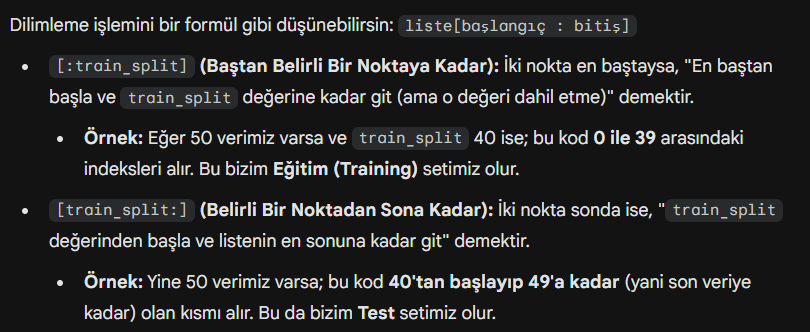

In [5]:
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions):
  plt.figure(figsize = (10, 7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size":14})

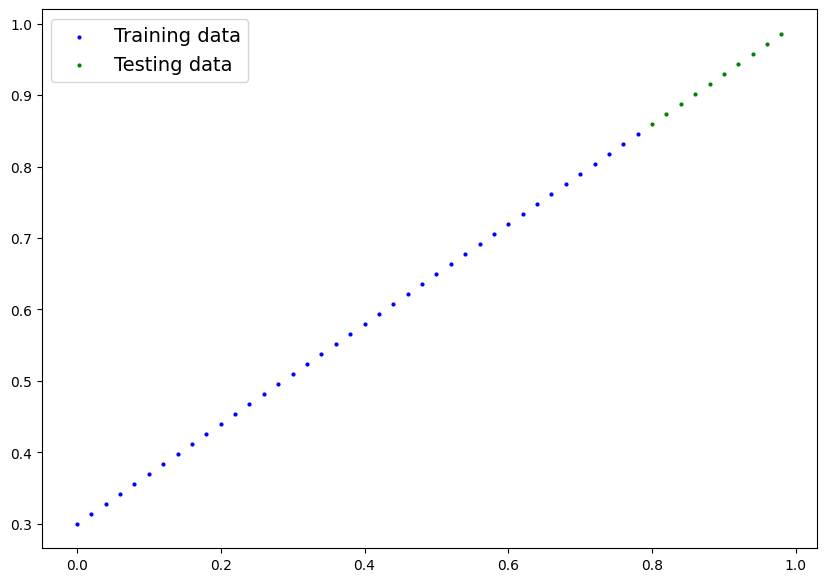

In [6]:
plot_predictions(X_train, y_train, X_test, y_test, None)

Bu fonksiyon, elindeki verileri ve ileride modelinin yapacağı tahminleri tek bir tabloda görmeni sağlar.

- Mavi Noktalar (train_data): Modelin "ders çalışırken" kullandığı eğitim verileridir.

- Yeşil Noktalar (test_data): Modelin hiç görmediği, "sınavda" karşısına çıkacak olan test verileridir.

- Kırmızı Noktalar (predictions): Eğer fonksiyona tahminleri de gönderirsen, modelin yeşil noktaların nerede olması gerektiğini düşündüğünü kırmızı renkle çizer. Şu an henüz bir tahminimiz olmadığı için grafikte sadece mavi ve yeşilleri görüyoruz.

- 0.0 ile 0.8 arası (Mavi): Bu kısım verinin %80'idir. Model sadece bu mavi noktalar arasındaki ilişkiyi öğrenmeye çalışacak.

- 0.8 ile 1.0 arası (Yeşil): Bu kısım verinin %20'sidir. Model eğitildikten sonra, bu boşluğa gelen yeşil noktaları doğru tahmin edip edemediğine bakacağız.

# 2. Model Oluşturma

In [7]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    # Initialize model parameters
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float
    ))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float
                                         ))
    # self.weights ve self.bias: Bunlar modelin öğreneceği küçük parametrelerdir. Kodda torch.randn(1) kullanılarak başlangıçta tamamen rastgele sayılar olarak atanırlar.

    # nn.Parameter: Tanımlanan tensörleri modelin "eğitilebilir" parametreleri olarak işaretler.

    # requires_grad=True: Bu ifade kritiktir. PyTorch'a, "eğitim sırasında bu sayıların hatalarını takip et ve gradyan inişi (gradient descent) ile bunları güncelle" talimatını verir.



  def forward(self, x: torch.Tensor):
    return self.weights * x + self.bias
  # Her nn.Module alt sınıfı, bu metodu geçersiz kılmalı (override) ve kendi hesaplama mantığını yazmalıdır.

  # Burada lineer regresyon formülü uygulanır.

Süreç şöyle işleyecek:

1. Model rastgele sayılarla bir tahmin yapacak.

2. Tahminin gerçek cevaptan ne kadar uzak olduğuna bakacak (Loss function).

3. forward metodundaki formülü kullanarak hatalarını düzeltecek ve rastgele olan sayıları adım adım 0.7 ve 0.3'e yaklaştırmaya çalışacak.

- `torch.nn:` PyTorch'un sinir ağları için sunduğu ana kütüphanedir. İçerisinde hesaplama grafiklerini (computational graphs) oluşturmak için gerekli olan tüm katmanları, aktivasyon fonksiyonlarını ve yapıları barındırır. Projende kullandığın her şey aslında bu paketin bir parçasıdır.

- `nn.Module:` PyTorch'taki tüm sinir ağı modellerinin temel sınıfıdır (base class). Eğer bir sinir ağı oluşturuyorsan, yazdığın sınıf mutlaka nn.Module'den miras almalıdır. Bu sayede PyTorch, modelindeki parametreleri otomatik olarak takip edebilir.

    - Zorunluluk: Bir nn.Module alt sınıfı oluşturduğunda, modelin veriyi nasıl işleyeceğini belirten bir forward() metodunu mutlaka yazman gerekir.
  
- `nn.Parameter:` Modelin içindeki ağırlıklar (weights) ve sapmalar (bias) gibi özel tensörlerdir. Normal bir tensörden farkı, requires_grad=True olarak ayarlandığında PyTorch'un bu sayıları eğitim sırasında "güncellenmesi gereken değerler" olarak işaretlemesidir. Bu parametreler, Gradyan İnişi (Gradient Descent) algoritması tarafından otomatik olarak optimize edilerek en doğru sonuca ulaşmaya çalışır.

- `def forward():` Modelin "akıl yürütme" kısmıdır. Girdi verisi (tensör) modele girdiğinde, bu metodun içindeki matematiksel işlemlerden (örneğin $y = mx + b$) geçerek bir çıktı üretir. Kural olarak ise her nn.Module alt sınıfı kendi forward() işlemini tanımlamak zorundadır.

- `torch.optim:` Modelin yaptığı hataları düzeltmek için kullanılan algoritmalar paketidir. Modelin tahminleri ile gerçek sonuçlar arasındaki farkı (kaybı/loss) azaltmak için nn.Parameter içindeki sayıların nasıl değişmesi gerektiğini hesaplar. Popüler örnekleri SGD ve Adam'dır.

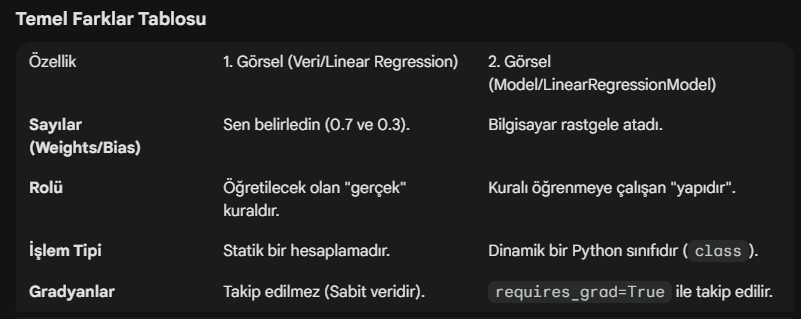

Üstteki veri hazırlama ile model oluşturma arasındaki fark böyle anlatılabilir.

### Model Instance Oluşturma

In [8]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()

Yazdığın LinearRegressionModel sınıfından canlı bir nesne (object) oluşturuyorsun. Sınıfın içindeki __init__ fonksiyonu tetiklenir ve self.weights ile self.bias için rastgele sayılar üretilir.;

In [9]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

Bu ise modelin içindeki eğitilebilir tüm sayıları (tensörleri) bir liste halinde getirir. Ekranda 0.3367 (weights) ve 0.1288 (bias) gibi sayılar görüyorsun. Bunlar modelin "başlangıç tahminleri"dir. **Hatırla**, senin hedef değerlerin 0.7 ve 0.3 idi. Model şu an bu hedeflerden çok uzak, çünkü tamamen rastgele başladı.

In [10]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

Bu ise modelin içindeki parametreleri, onlara verdiğin isimlerle (weights ve bias) birlikte bir Python sözlüğü (OrderedDict) olarak gösterir. Bu komut, parametreleri liste halinde görmekten çok daha profesyonel ve okunaklıdır. Özellikle modelini kaydedip daha sonra geri yüklemek istediğinde bu "durum sözlüğünü" kullanacaksın.

### torch.inference_mode() ile Tahmin Yapma

In [11]:
with torch.inference_mode():
  y_preds = model_0(X_test)

Kodda gördüğün with torch.inference_mode(): yapısı bir Context Manager'dır (bağlam yöneticisi).
- PyTorch'a, "Şu an eğitim yapmıyorum, sadece tahmin yürütüyorum (inference)" der.
- Eğitim sırasında gradyanların (hataların) takibi için arka planda çalışan "defter tutma" işlemini (gradient tracking) tamamen kapatır.
- Gradyan takibi kapatıldığı için işlemler çok daha hızlı gerçekleşir ve bilgisayarın belleğini (RAM/VRAM) çok daha az kullanır.



> y_ preds = model_0(X_test) burada ne oluyor?

Test verilerini (X_test) modele gönderiyoruz. Bu komut otomatik olarak modelin içindeki forward() metodunu tetikler. Model, elindeki rastgele ağırlıklarla $y = weight \cdot X + bias$ işlemini yapar ve sonuçları y_preds değişkenine atar.


In [12]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


- 10 adet test örneği için 10 adet tahmin yapılmış. Bu, her bir $X$ girdisi için bir $y$ çıktısı üretildiğini gösterir.

- Çıktıda 0.3982, 0.4049 gibi değerler görüyorsun. Bu sayılar şu an tamamen rastgele başlangıç parametrelerine dayandığı için gerçek dünyada hiçbir anlam ifade etmiyor.

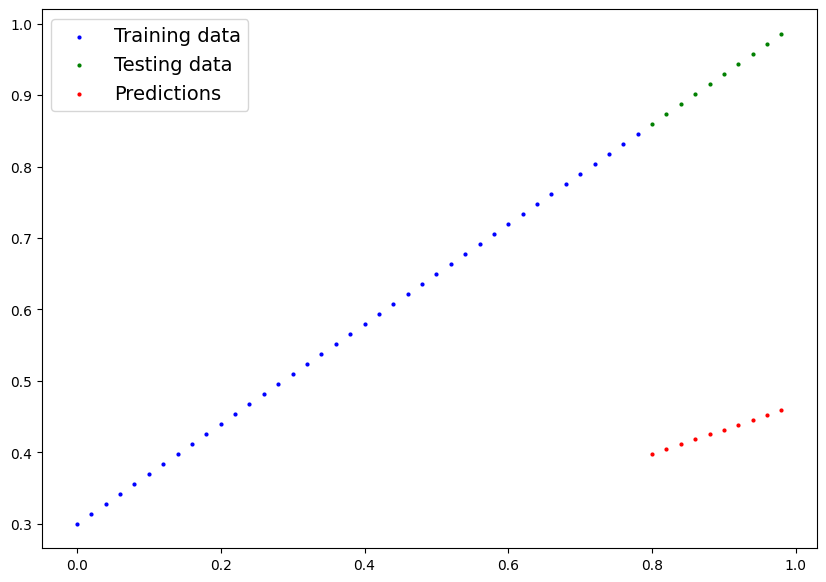

In [13]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds)

- Mavi Noktalar: Modelin ders çalışması gereken eğitim verileri.
- Yeşil Noktalar: Modelin ulaşması gereken hedef (doğru cevaplar).
- Kırmızı Noktalar (Tahminler): Modelin "Bence cevaplar buralarda bir yerde" dediği yer.

Analiz: Gördüğün gibi kırmızı noktalar yeşil hedeflerden çok uzakta ve bambaşka bir yerde duruyor. Görseldeki "Woah! Those predictions look pretty bad..." (Vay canına! Bu tahminler oldukça kötü görünüyor) notu tam olarak buna dikkat çekiyor.

In [14]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

Burada gerçek sonuçlar ile tahminler arasındaki fark hesaplanıyor. Model şu an sadece "kafasına göre" sallıyor çünkü henüz mavi noktaları (eğitim verilerini) inceleyip onlardan bir ders çıkarmadı.

# 3. Train Model

`Kayıp Fonksiyonu (Loss Function):` Modelin ne kadar "yanıldığını" ölçen matematiksel bir cetveldir.
- Modelin yaptığı tahminler (y_preds) ile gerçek cevaplar (y_test) arasındaki farkı hesaplar.
- Bu değer ne kadar düşükse, model o kadar iyidir.
- MAE (Mean Absolute Error - Ortalama Mutlak Hata), tahminlerin gerçek değerden ne kadar uzakta olduğunun mutlak ortalamasını alır. PyTorch'ta bu torch.nn.L1Loss() olarak adlandırılır.

`Optimize Edici (Optimizer):` Kayıp fonksiyonu "Hatalısın" der, Optimizer ise "Hatayı azaltmak için şu vidayı (parametreyi) şöyle sıkmalısın" der.
- Kayıp fonksiyonundan gelen veriyi kullanarak modelin içindeki weights ve bias değerlerini günceller.
- Gradyan İnişi (Gradient Descent) mantığıyla hareket eder.
- SGD (Stochastic Gradient Descent): Rastgele gradyan inişi; en temel ve etkili yöntemlerden biridir.
- Adam: Daha gelişmiş, hızı kendi kendine ayarlayabilen popüler bir optimizasyon algoritmasıdır.

Bu İkili Nasıl Birlikte Çalışır? (Eğitim Döngüsü Mantığı)

1. Tahmin Et: Model mevcut (rastgele) ağırlıklarıyla bir sonuç üretir.

2. Hata Ölç (Loss): Kayıp fonksiyonu, bu sonucun gerçek hayattan ne kadar saptığını ölçer.
3. Geriye Yayılım (Backpropagation): PyTorch, bu hatadan yola çıkarak her bir parametrenin (weight/bias) hataya ne kadar "sebep olduğunu" hesaplar (gradyanları bulur).
4. Güncelle (Optimizer): Optimizer, bu gradyanları kullanarak ağırlıkları bir miktar değiştirir.

### MAE (Mean Absolute Error)

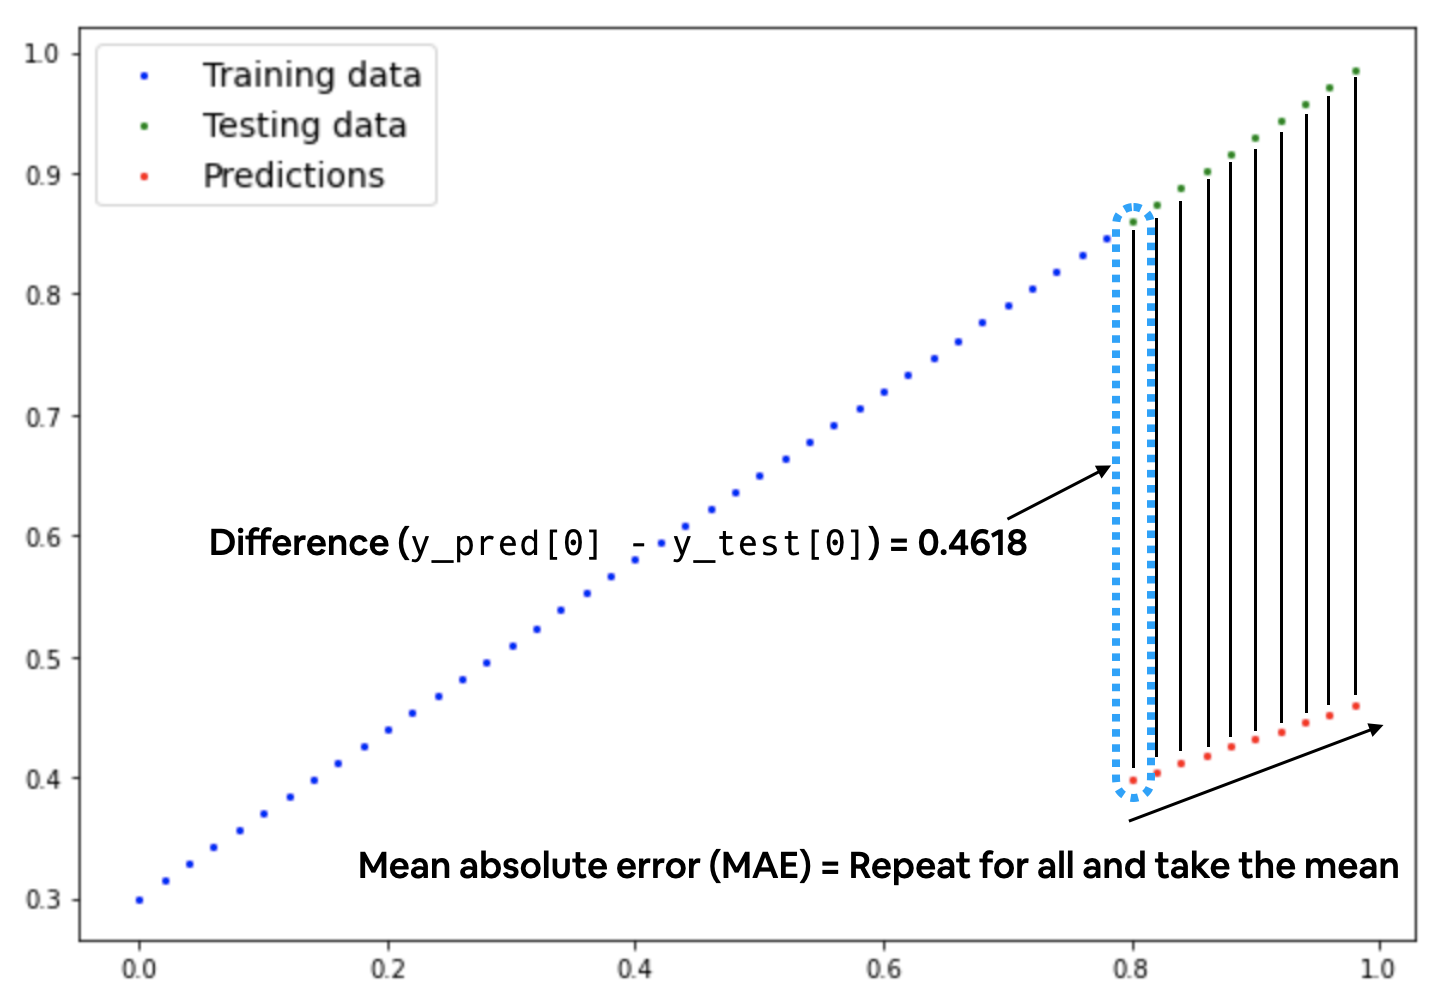

Grafiğe baktığında yeşil noktalar (gerçek değerler) ile kırmızı noktalar (modelin hatalı tahminleri) arasında siyah dikey çizgiler göreceksin.
- Siyah Çizgiler: Bu çizgiler, modelin tahmininin gerçek değerden ne kadar saptığını gösteren "hata mesafeleri"dir.
- Matematiksel Karşılığı: Her bir nokta için yapılan $|y_{pred} - y_{test}|$ işlemidir. Görseldeki örnekte ilk test noktası için bu farkın 0.4618 olduğu belirtilmiş.

MAE (Mean Absolute Error) Nasıl Hesaplanır?

1. Farkı Bul: Her bir yeşil ve kırmızı nokta arasındaki dikey mesafeyi (farkı) hesapla.

2. Mutlak Değeri Al: Farkın yönü (aşağıda veya yukarıda olması) önemli değildir, sadece mesafenin uzunluğuna bakılır.
3. Ortalamasını Al: Tüm bu siyah çizgilerin uzunluklarını topla ve nokta sayısına böl.

Sonuç: Çıkan tek bir sayı (MAE), modelinin genel olarak ne kadar "yanlış" olduğunu söyler.

Bu görselde anlatılan tüm bu matematiksel süreci PyTorch'ta sadece tek bir satır kodla yapıyoruz:


> loss_fn = nn.L1Loss()

Bu komut, PyTorch'a "Hataları ölçerken MAE yöntemini kullan" talimatını verir.

Model eğitilirken hedefimiz, bu grafikteki siyah çizgileri yok etmektir. Eğitim ilerledikçe, Optimizer (optimizer) bu siyah çizgilerin boyunu kısaltmak için ağırlıkları günceller. İdeal durumda, kırmızı noktalar yeşil noktaların tam üzerine biner, siyah çizgiler kaybolur ve MAE = 0 olur.



In [15]:
# Hata ölçer (MAE) yani Loss Fonksiyonu
loss_fn = nn.L1Loss()

# Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

`params=model_0.parameters():` Optimizer'a "Hangi sayıları değiştireceksin?" sorusunun cevabını veriyoruz. Modelin içindeki o rastgele weights ve bias değerlerini hedef almasını söylüyoruz.

`lr=0.01 (Learning Rate):` Bu, optimizasyonun en kritik ayarıdır. Bu bir hiperparametredir (yani modelin kendisi değil, mühendis tarafından dışarıdan ayarlanan bir değerdir).
   - **Yüksek Learning Rate (Örn: 0.1 veya daha fazlası):** Optimizer çok büyük adımlar atar. Bu, hedefe hızlı ulaşmayı sağlayabilir ama bazen o kadar büyük adımlar atar ki hedefi (minimum hata noktasını) ıskalayıp dışarı fırlayabilir.
   - **Düşük Learning Rate (Örn: 0.0001):** Optimizer çok küçük ve dikkatli adımlar atar. Hata yapma payı düşer ama ideal değerleri bulması çok uzun zaman alabilir.
   - Genellikle 0.01, 0.001 gibi değerlerle başlanır ve zamanla ihtiyaca göre değiştirilir.

Özetle;

Şu an modelin elinde hem bir hata ölçer hem de bir tamir takımı var.

1. loss_fn ile "Ne kadar hatalıyım?" diye soracak.

2. optimizer ile "Hatamı azaltmak için ağırlıklarımı ne kadar kaydırayım?" sorusuna yanıt bulacak.

# Daniel Bourke'un Meşhur Şarkısı

`It's train time!`
- Eğitim zamanı

`Do the forward pass`
- İleri Geçiş Yap.
- Veriyi modele verip bir tahmin üretmesini sağlamaktır (y_pred = model(X_train)).
- Modelin o anki (rastgele) ağırlıklarıyla ne sonuç bulduğunu görmektir.

`Calculate the loss (Kaybı/Hatayı Hesapla)`
- Modelin tahmini ile gerçek sonucu karşılaştırmaktır (loss = loss_fn(y_pred, y_train)).
- Modelin ne kadar "hatalı" olduğunu matematiksel bir sayıya dökmektir.

`Optimizer zero grad (Gradyanları Sıfırla)`
- Optimizer'ın içindeki eski gradyan (hata yönü) bilgilerini temizlemektir (optimizer.zero_grad()).
- PyTorch varsayılan olarak gradyanları üst üste ekler (biriktirir). Her yeni adımda temiz bir sayfa açmazsan, eski hatalar yeni hatalara karışır ve modelin kafası karışır.

`Losssss backwards! (Geriye Yayılım)`
- Hatayı modelin içindeki parametrelere geri göndermektir (loss.backward()).
- Modelin içindeki her bir ağırlığın (weight) ve sapmanın (bias), toplam hataya ne kadar sebep olduğunu hesaplamaktır (Gradyanları bulma aşaması).

`Optimizer step step step (Parametreleri Güncelle)`
- Optimizer'a, "Şimdi bu hesapladığın hataları kullanarak ağırlıkları biraz düzelt" demektir (optimizer.step()).
- Modelin parametrelerini, bir sonraki tahminde daha az hata yapacak şekilde (o meşhur Learning Rate hızıyla) güncellemektir.
----
`Test Döngüsü: Let's test now!`
- with torch.no_grad() veya inference_mode(): Gradyan takibini kapatırız çünkü test sırasında modeli değiştirmeyiz, sadece performansını ölçeriz.

- "Watch it go down down down!": Başarılı bir eğitimde, her döngüde (epoch) hata değerinin küçüldüğünü görmeyi bekleriz.


### Training Loop

`1. Forward Pass (İleri Geçiş):`
- y_pred = model(X_train)şeklinde kodu vardır.
- Model, eğitim verilerini alıp içindeki forward() fonksiyonunu çalıştırır.
- Bu adımda model, mevcut ağırlıklarıyla bir tahmin üretir. İlk turda bu tahminler tamamen rastgeledir.

`2. Calculate the Loss (Kaybı Hesapla):`
- Kod: loss = loss_fn(y_pred, y_train)
- Tahmin edilen değerler (y_pred) ile gerçek cevaplar (y_train) karşılaştırılır.
- Sistemin hata payını sayısal bir değere (skaler) dönüştürürüz. Bu sayı ne kadar büyükse, model o kadar yanlış yoldadır.

`3. Zero Gradients (Gradyanları Sıfırla):`
- Kod: optimizer.zero_grad()
- Optimizer'ın hafızasındaki eski gradyan değerleri temizlenir.
- PyTorch gradyanları varsayılan olarak üst üste toplar (accumulate). Eğer her turda sıfırlamazsan, bir önceki turun hataları bu tura eklenir ve modelin "kafası karışarak" yanlış yöne gitmesine sebep olur.

`4. Backpropagation (Geriye Yayılım):`
- Kod: loss.backward()
- Toplam hatadan yola çıkarak, her bir parametrenin (weight ve bias) bu hataya ne kadar katkıda bulunduğu (türevi/gradyanı) hesaplanır.
- Sistemin hangi parçasının ne kadar hatalı olduğunu tespit etme aşamasıdır.

`5. Update Optimizer (Parametreleri Güncelle):`
- Kod: optimizer.step()
- Optimizer, bir önceki adımda hesaplanan gradyanları kullanarak ağırlıkları bir miktar (learning rate kadar) değiştirir.
- Hatalardan ders çıkarıp sistemi iyileştirme, yani asıl "öğrenme" anıdır.



> for epoch in range(epochs):: Bu döngü, modelin veriye kaç kez bakacağını belirler. Örneğin 100 epoch, modelin bu 5 adımı 100 kez tekrarlayacağı anlamına gelir.


> model.train(): Modeli "eğitim moduna" sokar. Bazı katmanlar (örneğin Dropout) eğitim ve test aşamasında farklı davranır, bu komutla modele "Şu an öğreniyorsun, ona göre davran" denir.






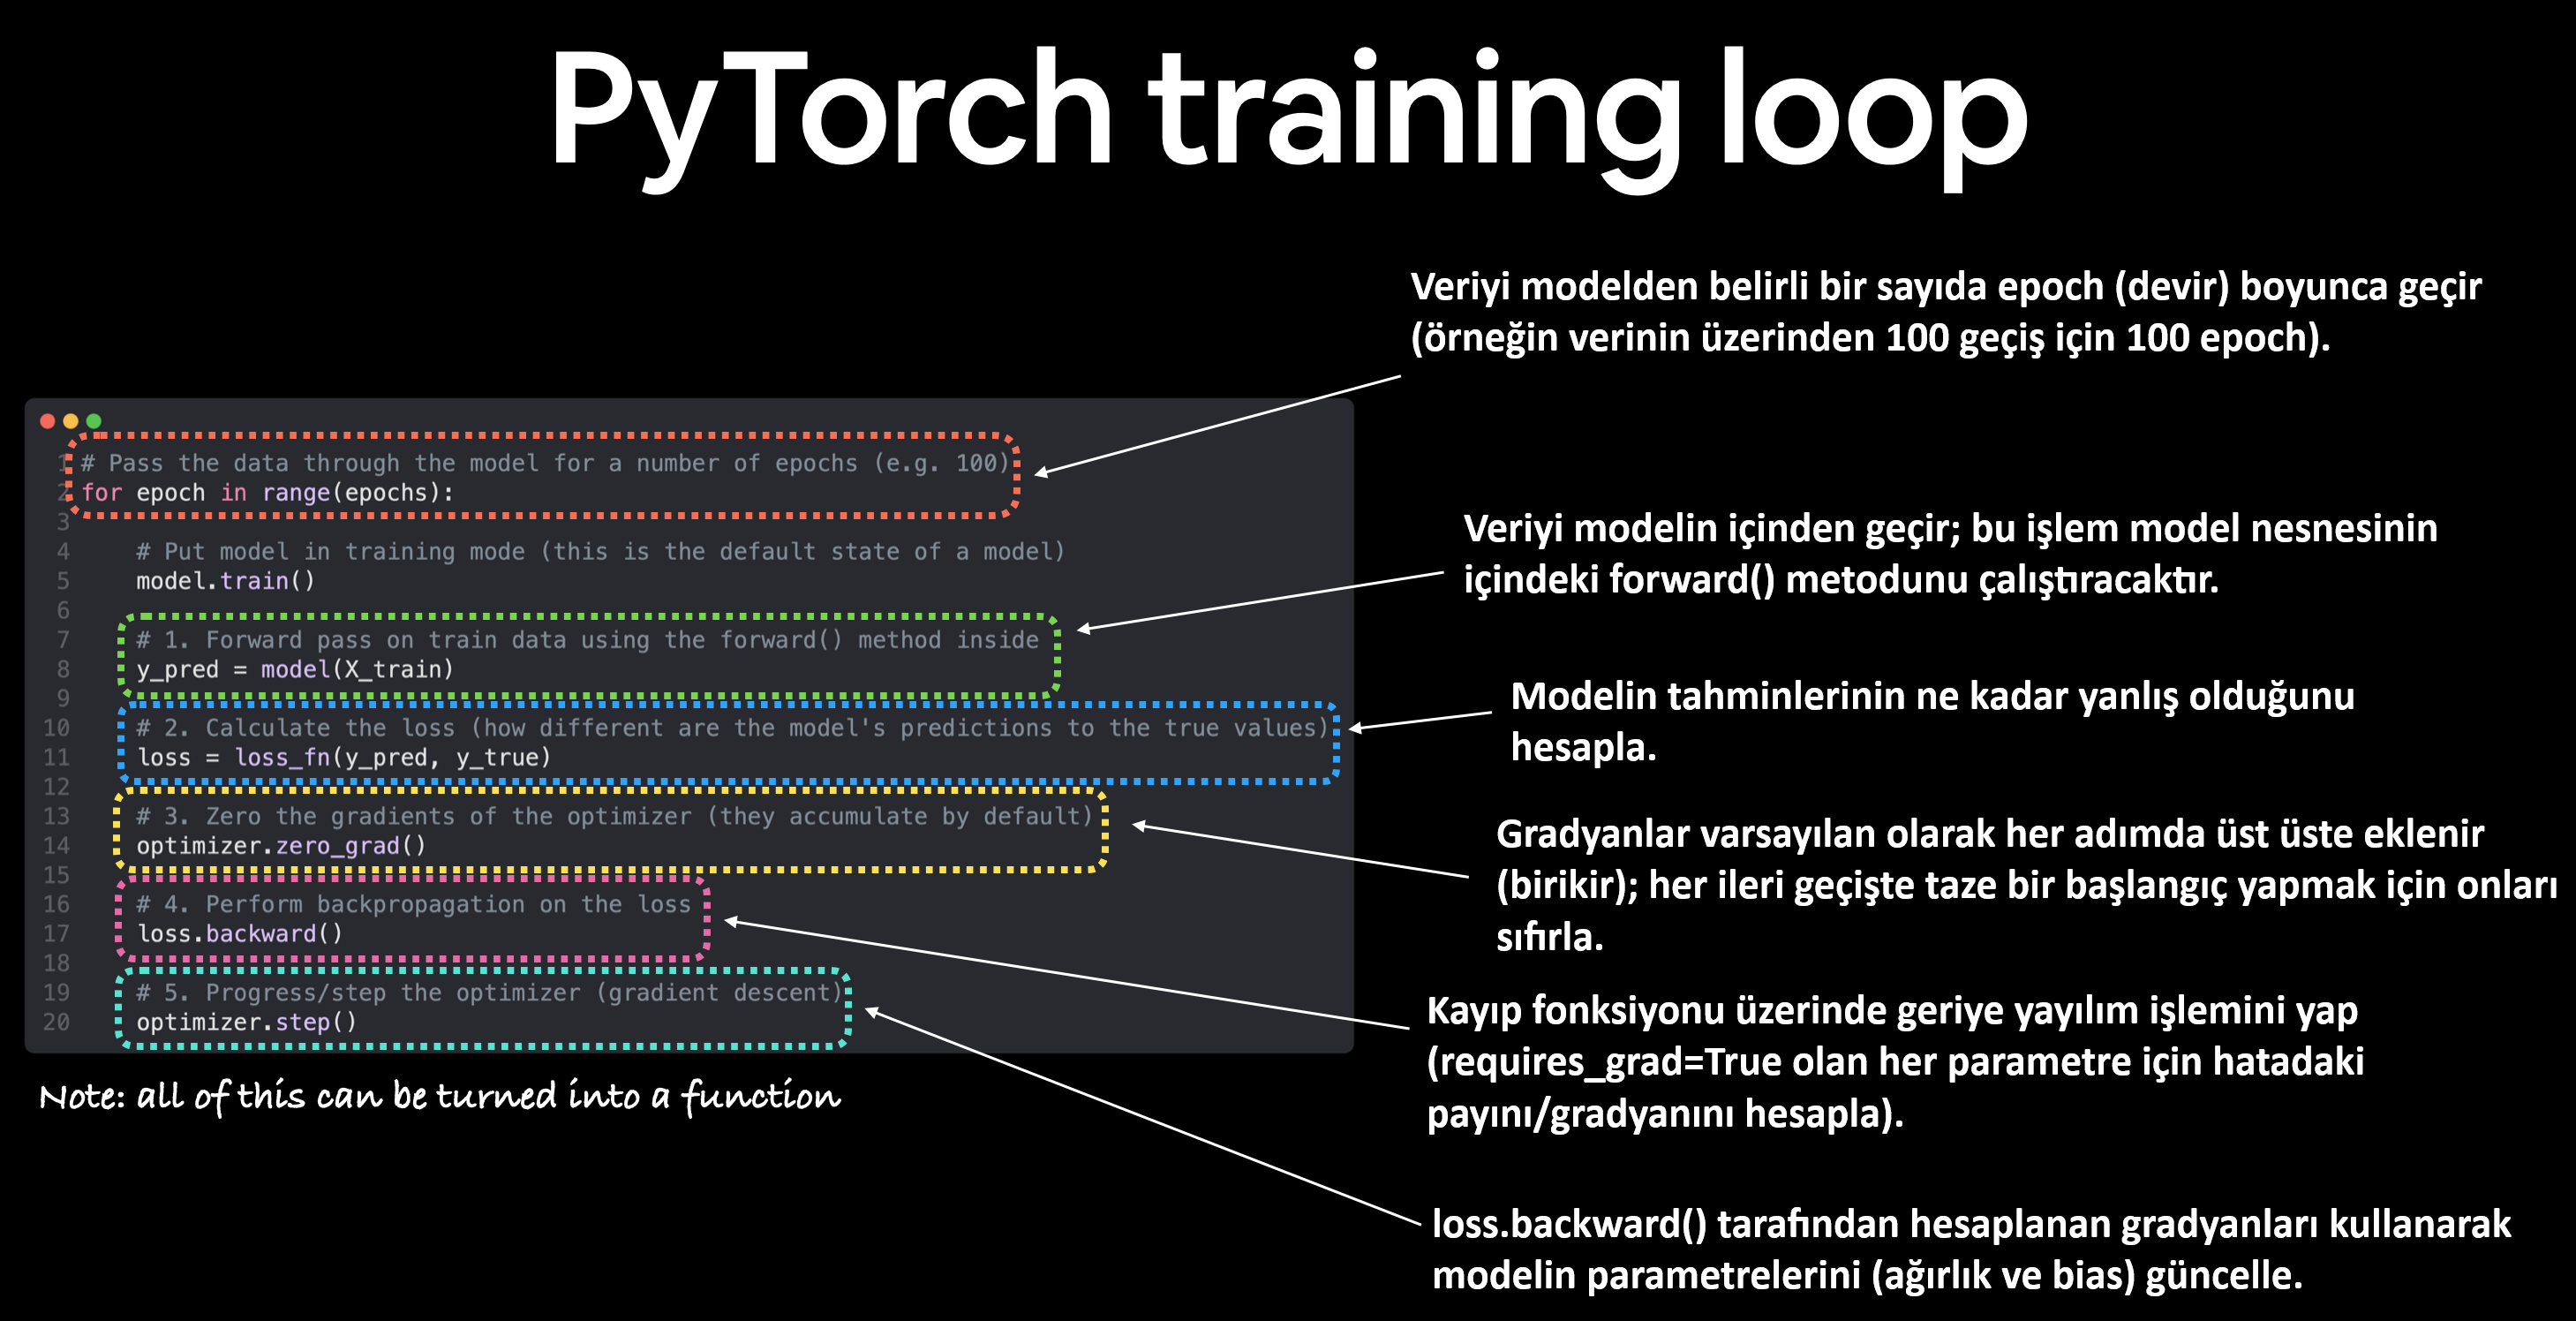

- loss.backward() komutunu çalıştırmadan önce mutlaka loss = ... satırı ile bir kayıp değeri hesaplamış olmalısın. Geriye yayılım (backpropagation), mevcut bir hata miktarını (loss) baz alarak gradyanları hesaplar. Eğer ortada hesaplanmış bir "hata" yoksa, model neyi düzelteceğini bilemez.

- Geriye yayılım (loss.backward()) ile yeni gradyanları hesaplamadan önce optimizer.zero_grad() komutunu kullanmalısın. PyTorch, gradyanları her adımda otomatik olarak üst üste toplar (accumulate). Eğer her yeni döngüde (epoch) eski gradyanları sıfırlamazsan, bir önceki adımın hataları yeni hesaplamaya karışır ve modelin yanlış yönde ilerlemesine (öğrenememesine) neden olur.

- Optimizer'ı ilerletme (optimizer.step()) işlemini mutlaka geriye yayılım (loss.backward()) bittikten sonra yapmalısın. optimizer.step() komutu, o ana kadar hesaplanmış olan gradyanları kullanarak ağırlıkları (weights) günceller. Eğer geriye yayılım yapılmadan bu adımı atarsan, optimizer'ın elinde güncel bir "hata pusulası" olmayacağı için ağırlıkları değiştiremez.

### Backward Nedir?
Bir önceki adımda modelin bir tahmin yaptı ve bir Kayıp (Loss) değeri hesapladın. Örneğin modelin "Cevap 10" dedi ama gerçek cevap "8" idi. Aradaki fark 2 birim. Sadece "2 birim hata yaptım" demek yetmez. Modelin içindeki hangi parametrenin (weight mi yoksa bias mı) bu hataya ne kadar sebep olduğunu bilmen gerekir.
- Matematiksel olarak loss.backward() komutu çalıştırıldığında PyTorch, en sondaki hata değerinden başlayarak geriye doğru türev alır.
- Ağırlıklar (Weights): "Ben bu ağırlığı %1 artırırsam hata ne kadar değişir?" sorusunun cevabı hesaplanır.
- Sapma (Bias): "Ben bu bias değerini %1 azaltırsam hata nasıl etkilenir?" sorusuna yanıt bulunur.

Bu hesaplanan türev değerlerine biz Gradyan diyoruz.

- Kodda requires_grad=True olarak işaretlediğin her parametre için PyTorch arka planda bir "hesaplama grafiği" tutar.
- loss.backward() dendiği an, bu grafik üzerinden geriye doğru gidilir. Her bir parametrenin (weight ve bias) .grad isimli bir cebi olduğunu düşün. Bu işlem sonucunda, o cebin içine "hatayı azaltmak için gitmen gereken yön" bilgisi (sayısal olarak) koyulur.

###Testing Loop

Eğitim döngüsünden en büyük farkı, test sırasında modelin ağırlıklarını değiştirmememizdir.
- Amaç: Modelin eğitim verileri dışındaki yeni verilere (test seti) ne kadar iyi genelleme (generalization) yaptığını görmektir.
- Kritik Fark: Test döngüsünde asla loss.backward() (geriye yayılım) veya optimizer.step() (güncelleme) kullanılmaz. Çünkü sınav sırasında öğrenciye cevapları söylemezsiniz, sadece performansını ölçersiniz.


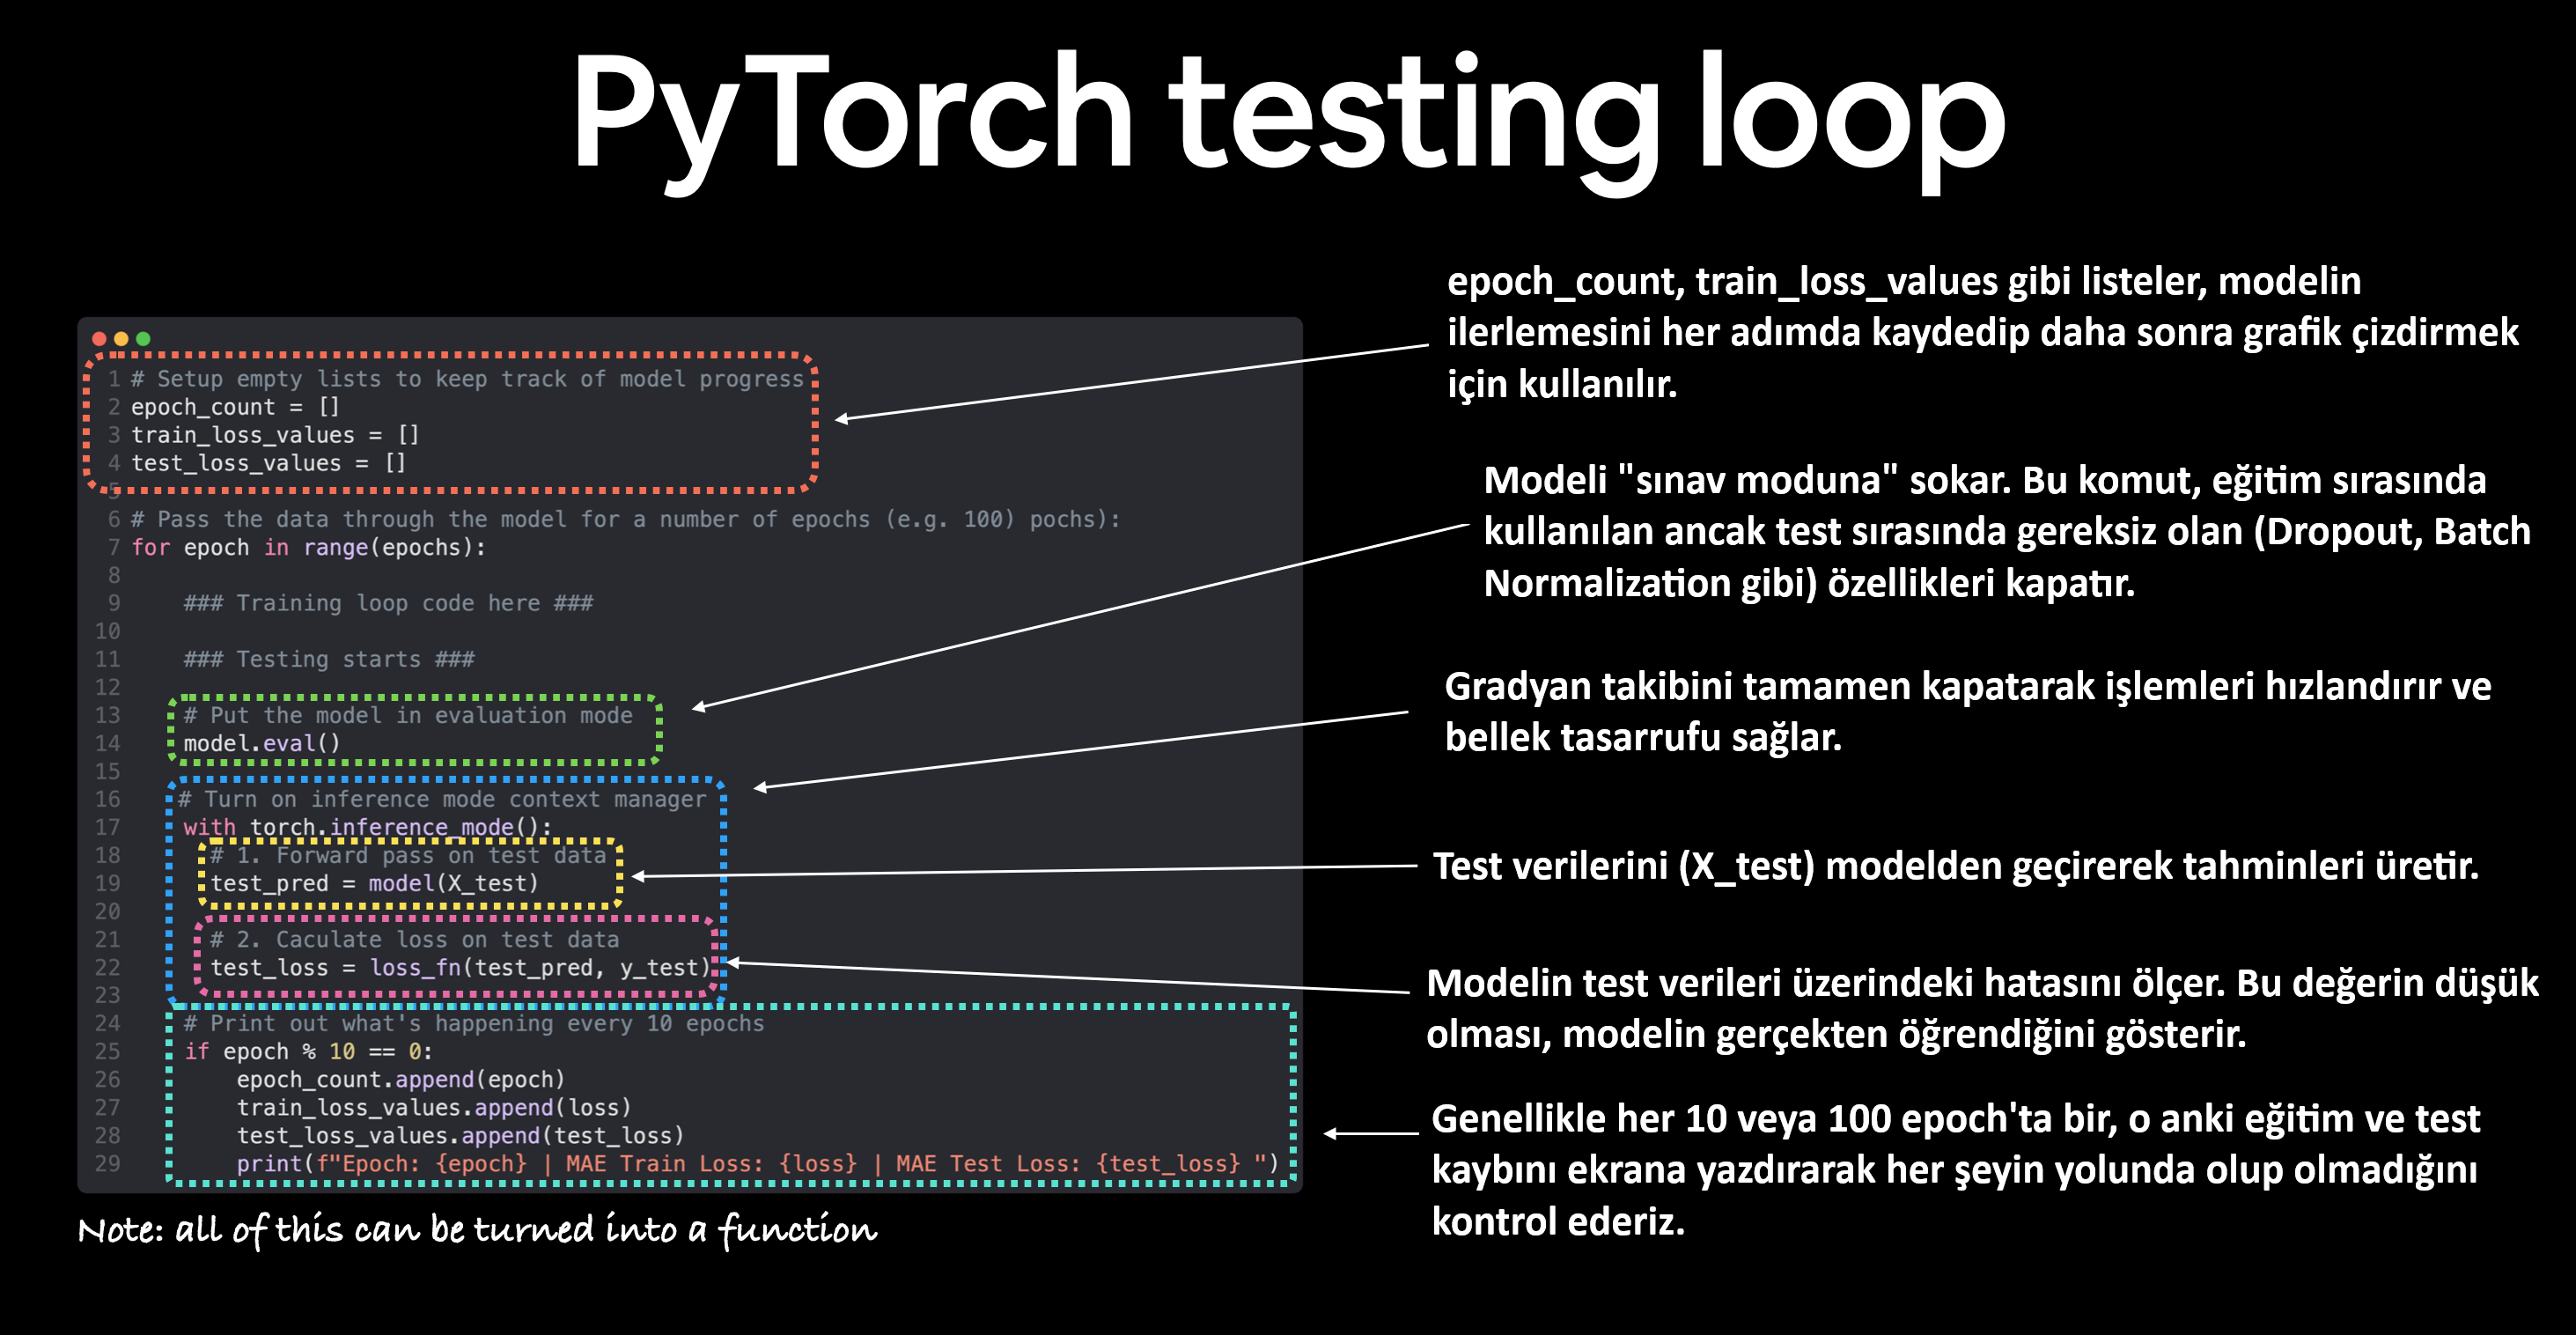

Kısacası test aşaması aşağıdaki gibidir :

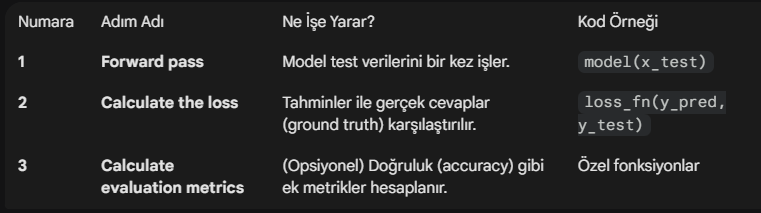

In [16]:
torch.manual_seed(42)
# Şans faktörünü ortadan kaldırır; deneyi her yaptığında aynı rastgele sayıları almanı sağlar.

epochs = 100
# Bu öğrencinin (modelin), kitabın üzerinden tam 100 kez geçeceği anlamına gelir.

train_loss_values = []
test_loss_values = []
epoch_count = []
# Modelin her adımda ne kadar hata yaptığını kaydedeceğimiz bir "not defteri" tutuyoruz.



# Training Aşaması
for epoch in range(epochs):

  model_0.train()
  # Modele eğitim moduna aldındığı bildirilir.

  y_pred = model_0(X_train)
  # (Forward Methodu): Çırak önüne gelen soruları (X) kendi kafasındaki (rastgele) yöntemle çözer.

  loss = loss_fn(y_pred, y_train)
  # (Hata Ölçümü): Usta (Loss Function), çırağın verdiği cevaplar ile gerçek cevap anahtarını karşılaştırır.

  optimizer.zero_grad()
  # (Hafızayı Temizle): Bir önceki sorudaki kafa karışıklığını sileriz ki yeni hatayı temiz bir beyinle hesaplasın.

  loss.backward()
  # (Geriye Yayılım): Hatanın kaynağına, yani modelin içindeki ağırlıklara (weights) gidilir. "Senin yüzünden şu kadar saptık" denilerek gradyanlar hesaplanır.

  optimizer.step()
  # (Düzenleme): Usta vidayı biraz sıkar. Ağırlıkları, bir sonraki turda daha az hata yapacak şekilde bir adım (learning rate) kaydırır.



  # Testing Aşaması :
  # Çırak bir tur çalıştıktan sonra, ona hiç görmediği sorulardan oluşan küçük bir deneme sınavı yapıyoruz

  model_0.eval()
  # "Sınav başladı, kopya çekmek (parametre değiştirmek) yok!" modu.

  with torch.inference_mode():
  # Bu bir koruma kalkanıdır. PyTorch'a "Bu sırada gradyan hesaplama, boşuna yorulma, sadece tahminde bulun" der.
  # Bu, işlemi hızlandırır ve bilgisayarı rahatlatır.

    test_pred = model_0(X_test)
    # Forward pass bu kez test verisi üzerinde yapılır.

    test_loss = loss_fn(test_pred, y_test.type(torch.float))
    # Test datası üzerinden loss hesaplanır.

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
    # Her 10 epochda bir ne olduğu hesaplanır.


Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819 


Şimdi de bu durumu görebileceğimiz loss curve çizelim.

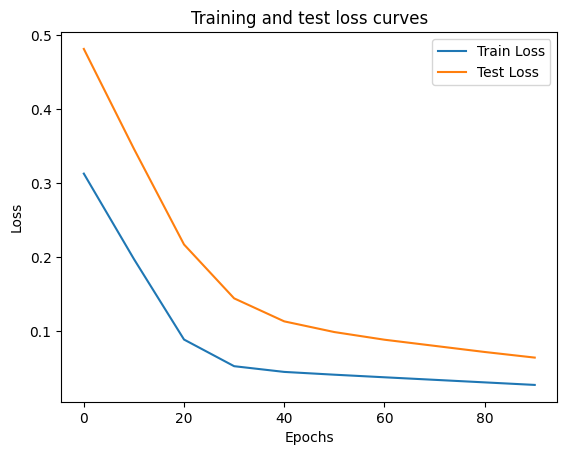

In [17]:
plt.plot(epoch_count, train_loss_values, label = "Train Loss")
plt.plot(epoch_count, test_loss_values, label = "Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

* Mavi Çizgi (Train Loss): Modelin eğitim verileri üzerinde yaptığı hatadır. Model, her bir epoch'ta (devirde) hatalarından ders çıkardıkça bu çizgi aşağı iner.

* Turuncu Çizgi (Test Loss): Modelin daha önce hiç görmediği "sınav" verileri üzerindeki hatasıdır.

Kritik Gözlem: Her iki çizginin de aşağı doğru eğimli olması, modelin sadece ezberlemediğini (overfitting yapmadığını), gerçekten öğrendiğini gösterir.*

Grafiğe dikkatli bakarsan, yaklaşık 20. epoch civarında sert bir düşüşten sonra çizgilerin daha yavaş bir eğimle devam ettiğini fark edeceksin.

Buna "dirsek" denir. Model, ana kuralı ($y = 0.7x + 0.3$) ilk 20 turda büyük oranda çözmüş, geri kalan 80 turda ise sadece ince ayar (fine-tuning) yapmıştır.

In [18]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'weights': tensor([0.5784]), 'bias': tensor([0.3513])})

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


Şimdi ise eğitilen model üzerinden tahmin yapalım.

In [19]:
model_0.eval()
# Modeli değerlendirme moduna sokar.

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

Şimdi aradaki sapmayı yani loss miktarını daha iyi görebilmek için grafik çizelim.

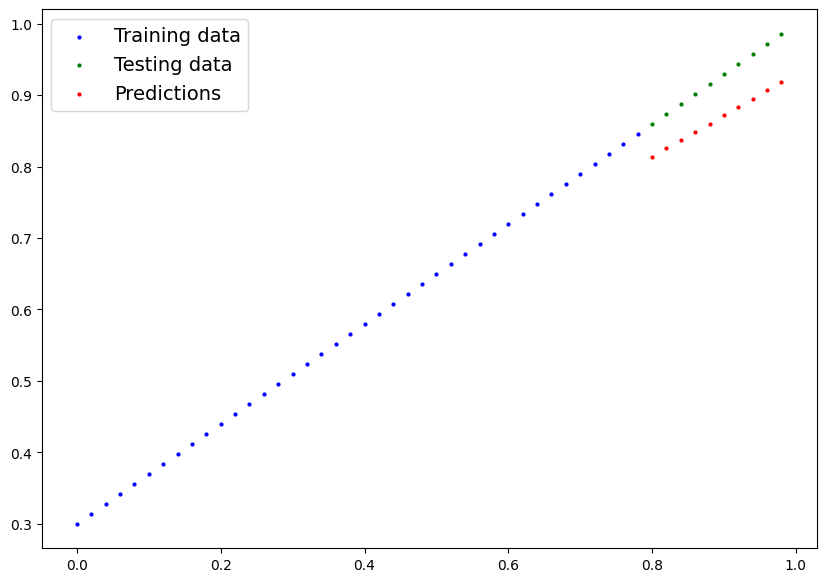

In [20]:
plot_predictions(train_data= X_train, train_labels=y_train, test_data=X_test, test_labels=y_test,
                 predictions=y_preds)

Görüldüğü üzere rastgele tahmin yapma halinden 100 epoch sonundaki hale geçerken loss miktarı baya bir azaldı ve prediction değerleri olması gereken yerlere yaklaştı.

# 4. Save and Load Model

PyTorch bu işlem için Python'ın pickle (turşulama/serileştirme) mekanizmasını kullanır.

`torch.save (Diske Kaydetme)`
- Nedir?: Modelini veya herhangi bir PyTorch nesnesini (tensörler, sözlükler vb.) bilgisayarının hafızasından (RAM) alıp kalıcı bir dosya olarak diske yazar.

- Nasıl Çalışır?: Python'ın pickle kütüphanesini kullanarak nesneyi serileştirir.

- Uygulama: Genellikle modelin sadece ağırlıklarını içeren model.state_dict() yapısını kaydetmek için kullanılır. Dosya uzantısı genelde .pt veya .pth olur.

`torch.load (Dosyadan Yükleme)`
- Nedir?: Diske kaydettiğin o .pt dosyasını tekrar Python ortamına geri getirir.

- Özelliği: Sadece dosyayı okumakla kalmaz, yüklerken nesnenin hangi cihaza (CPU veya GPU) aktarılacağını da seçmene olanak tanır.

- Kritik Not: Yüklediğin şey bir modelin tüm iskeleti değil, genellikle sadece sayısal parametreleridir.

`torch.nn.Module.load_state_dict (Ağırlıkları Giydirme)`
- Nedir?: En önemli adımdır. torch.load ile okuduğun parametre sözlüğünü (state_dict), boş bir model iskeletine "giydirir".

- Mantığı: Önce boş bir model sınıfı oluşturursun (başlangıçta ağırlıkları rastgeledir), sonra bu fonksiyonla o boş ağırlıkların üzerine kaydettiğin "akıllı" ağırlıkları yazarsın.

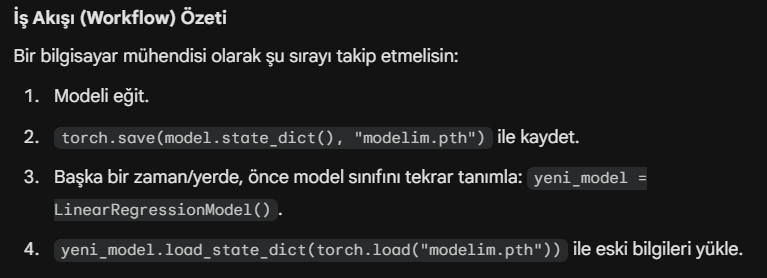

### Model Saving

In [21]:
from pathlib import Path

# 1. Önce modeller dizisini oluşturduk
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)  #exist_ok=True: Bu parametre kritiktir; eğer klasör zaten varsa hata vermez, yoksa oluşturur.

# 2. Kayıt Yolunun Belirlenmesi
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Modelin Kaydedilmesi
print(f"Kaydedilen modelin yolu = {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)


Kaydedilen modelin yolu = models/01_pytorch_workflow_model_0.pth


* obj=model_0.state_dict(): En önemli kısım burası! Modelin tamamını değil, sadece içindeki eğitilmiş ağırlıkları (weights) ve sapmaları (bias) kaydediyoruz.

* Avantajı: Bu yöntem, modelin tüm iskeletini kaydetmekten çok daha az yer kaplar ve daha güvenlidir.

In [22]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 2117 Feb  9 18:20 models/01_pytorch_workflow_model_0.pth


### Model Loading

In [23]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))


<All keys matched successfully>

Burada henüz hiçbir şey bilmeyen, içindeki ağırlıklar rastgele atanmış yeni bir model örneği oluşturuyorsun.

state_dict()'i yükleyebileceğin bir "kutuya" ihtiyacın var. Bu kutunun (model sınıfının), orijinal modelle tam olarak aynı yapıda olması şarttır.

torch.load(f=...): Önce diskteki o .pth dosyasını okuyup içindeki sayıları Python'ın anlayacağı bir sözlük haline getirir.

load_state_dict(...): Bu sözlükteki "akıllı" sayıları alır ve senin yeni oluşturduğun loaded_model_0 modelinin içindeki o rastgele sayıların üzerine yazar.

In [24]:
# Şimdi yüklediğimiz modeli kullanmayı deneyelim.
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)


In [25]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

Kaydettiğim model ile geri yüklediğim model %100 aynı şekilde çalışıyor. Parametreler (weights ve bias) hiçbir kayıp yaşamadan taşındı.

# Putting it all Together

In [26]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [27]:
torch.__version__

'2.9.0+cu126'

Gerekli olan kütüphaneleri içeri import ederek başlıyoruz ve ardından GPU kontrolü yapıyoruz.

In [28]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [29]:
print(f"Using device is {device}")

Using device is cuda


Şimdi ise yukarıda yaptığımız gibi bir data seti oluşturarak başlayalım.

In [58]:
# denklemde yer alan weight ve bias sabitlerini oluşturma
weight = 0.7
bias = 0.3

# x ve y değerlerini oluşturma
X = torch.arange(start=0, end=1, step=0.02).unsqueeze(dim = 1)
y = weight * X + bias


In [59]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

0'dan başlayıp 1'e kadar 0.02şer adımlarla artacak şekilde lineer bir denklemden oluşan bir data seti hazırlamış olduk.

Şimdi de train ve test olarak bölme işlemi yapalım.

In [60]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

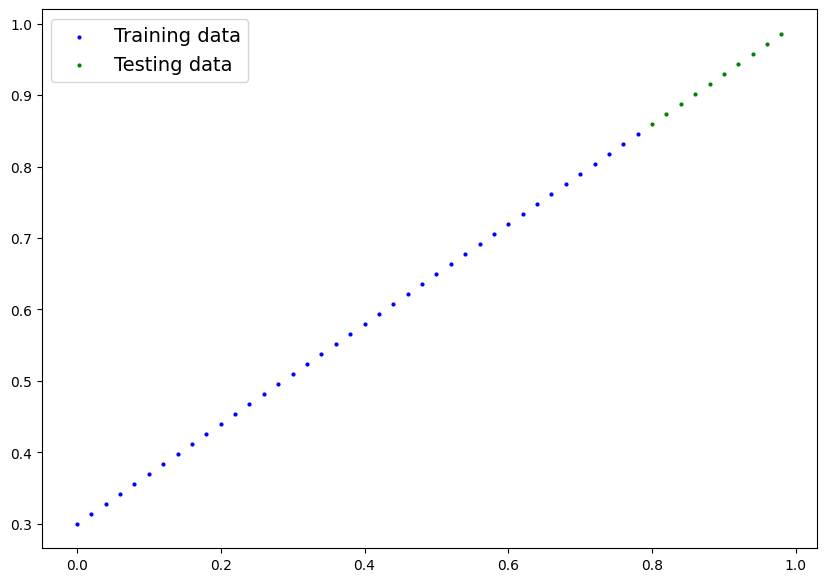

In [61]:
plot_predictions(
    train_data= X_train,
    train_labels= y_train,
    test_data= X_test,
    test_labels= y_test,
    predictions=None
)

Sayılar bazen yanıltıcı olabilir; bu yüzden veriyi grafik üzerinde görmek, verinin yapısını anlamanı sağlar.

- Mavi Noktalar (Training Data): Modelin öğrenmek için kullanacağı ana gövdeyi temsil eder.

- Yeşil Noktalar (Testing Data): Modelin tahmin etmeye çalışacağı "gelecekteki" veya "bilinmeyen" noktaları temsil eder.

Elimizde şu an

- Modelin öğreneceği bir yol haritası (Mavi noktalar).

- Öğrendiğini ispatlayacağı bir sınav alanı (Yeşil noktalar) var.

Şimdi ise aşağıdaki kod PyTorch'ta model oluşturmanın "manuel" yolundan "profesyonel ve otomatik" yoluna geçişini gösteriyor. Bir bilgisayar mühendisi olarak, işleri otomatize eden araçları kullanmak her zaman daha verimlidir.

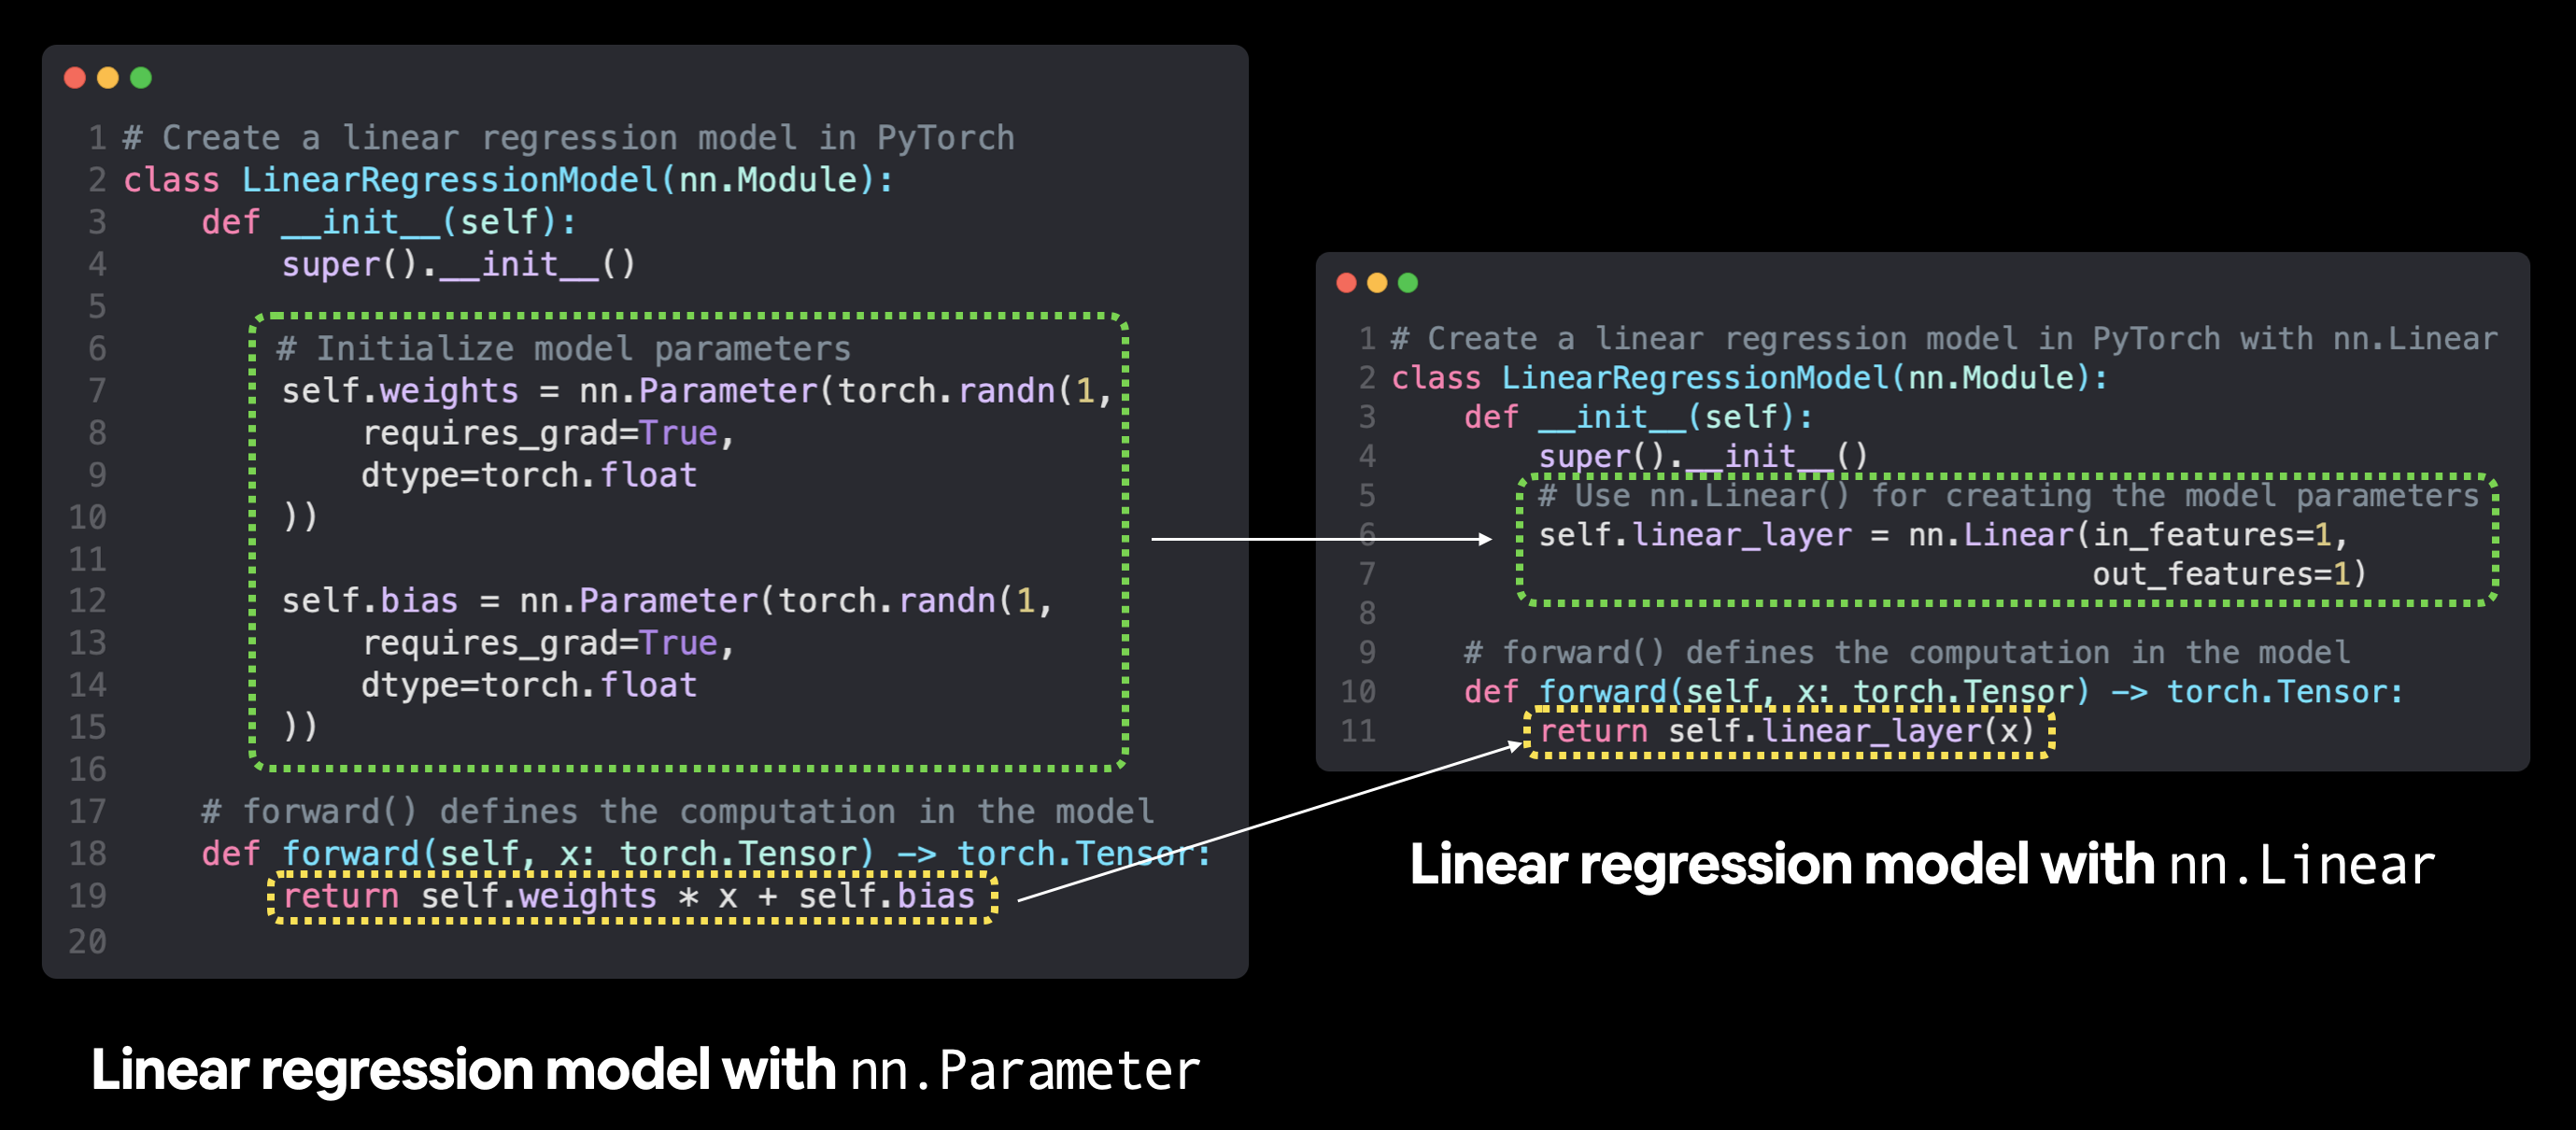

`Manuel vs. Otomatik (Profesyonel) Yaklaşım`

Görselin sol ve sağ taraflarındaki kodları karşılaştırdığımızda:

- Soldaki (nn.Parameter): Ağırlıkları (weights) ve sapmaları (bias) torch.randn ile tek tek elle tanımlıyorduk. Bu, çok katmanlı devasa ağlarda imkansız bir uğraştır.

- Sağdaki (nn.Linear): PyTorch'un hazır doğrusal katmanını kullanıyoruz. Bu katman, içindeki ağırlık ve bias değerlerini bizim yerimize otomatik olarak oluşturur ve yönetir. Derin öğrenme dünyasında katmanlar bu şekilde inşa edilir. torch.nn modülü içinde bunun gibi onlarca hazır katman (Convolutional, LSTM vb.) bulunur.

In [62]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer = nn.Linear(
        in_features=1,  # Modele giren her bir örnekte kaç adet özellik (feature) var? Bizim örneğimizde sadece X var, yani 1.
        out_features=1  # Model çıktı olarak kaç sayı üretecek? Bizim örneğimizde sadece y tahmini var, yani 1.
    )    #  Bu katman aslında yine o meşhur y = x * weights^T + bias işlemini yapar.

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)
    # PyTorch, katmanın içindeki çarpma ve toplama işlemlerini otomatik olarak halleder.

Şu an modelini "modern" bir şekilde inşa ettin. Artık parametreleri tek tek takip etmene gerek yok; nn.Linear senin için tüm o karmaşık matris çarpımlarını arka planda kusursuzca yapıyor.

In [63]:
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()

model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

Bir bilgisayar mühendisi olarak, yazdığın kodun sadece kendi bilgisayarında değil, devasa sunucularda veya güçlü ekran kartlarında (GPU) da sorunsuz çalışmasını istersin. İşte bu görseldeki adımlar bunu sağlıyor:

In [64]:
next(model_1.parameters()).device

device(type='cpu')

PyTorch modelleri varsayılan olarak CPU (İşlemci) üzerinde oluşturulur. Ancak büyük hesaplamalar için bu "yavaş yol"dur.

In [65]:
model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

Modelin içindeki tüm ağırlıkları (weight) ve sapmaları (bias) tek bir komutla hedef cihaza (senin durumunda CUDA yani GPU) ışınlar.

In [66]:
next(model_1.parameters()).device

device(type='cuda', index=0)

Burada unutmaman gereken en önemli kural şudur: Model neredeyse, veri de orada olmalıdır.

- Eğer modelini GPU'ya taşıdıysan (model_1.to(device)), eğitim sırasında ona vereceğin verileri de (X_train, y_train) mutlaka GPU'ya taşımalısın.

- Aksi takdirde PyTorch sana, "Cihazlar uyuşmuyor!" diyerek hata fırlatacaktır.

Şimdi sırada modelimizi eğitmek için gerekli olan son hazırlıkları, yani Kayıp Fonksiyonu (Loss Function) ve Optimizer seçimi var.

In [67]:
loss_fn = nn.L1Loss()
# (Mean Absolute Error - MAE). Modelin tahmini ile gerçek değer arasındaki mutlak farkın ortalamasını alır.

optimizer = torch.optim.SGD(
    params=model_1.parameters(),
    lr = 0.01
)
# Kayıp fonksiyonundan gelen hata miktarını alıp, modelin içindeki parametreleri (weights ve bias) "tamir eden" ustadır.

Şimdi her şey hazır. Artık train ve test looplarını yazıp oluşturabiliriz.

In [68]:
torch.manual_seed(42)
epochs = 1000

"""
KRITIK
Modeli daha önce GPU'ya (cuda) göndermiştik. Eğer veriler CPU'da kalsaydı, "cihaz uyuşmazlığı" hatası alırdık.
Artık hem işçi (model) hem de malzeme (veri) aynı fabrikada (GPU VRAM) bulunuyor. Bu, işlemleri devasa oranda
hızlandırır.
"""
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  # Training
  model_1.train()   # Model eğitim moduna alındı.

  y_pred = model_1(X_train)  # 1. Forward Pass

  loss = loss_fn(y_pred, y_train)  # 2. Loss hesaplama

  optimizer.zero_grad()   # 3. Gradyan hafızası temizleme

  loss.backward()   # 4. Gradyanlar hesaplanır.

  optimizer.step()   # 5. Parametre güncellemesi yapılır.

  # Testing
  model_1.eval()   # Test modeuna alındı.

  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} - Train Loss: {loss} - Test Loss: {test_loss}")

Epoch: 0 - Train Loss: 0.5551779866218567 - Test Loss: 0.5739762187004089
Epoch: 100 - Train Loss: 0.006215683650225401 - Test Loss: 0.014086711220443249
Epoch: 200 - Train Loss: 0.0012645035749301314 - Test Loss: 0.013801801018416882
Epoch: 300 - Train Loss: 0.0012645035749301314 - Test Loss: 0.013801801018416882
Epoch: 400 - Train Loss: 0.0012645035749301314 - Test Loss: 0.013801801018416882
Epoch: 500 - Train Loss: 0.0012645035749301314 - Test Loss: 0.013801801018416882
Epoch: 600 - Train Loss: 0.0012645035749301314 - Test Loss: 0.013801801018416882
Epoch: 700 - Train Loss: 0.0012645035749301314 - Test Loss: 0.013801801018416882
Epoch: 800 - Train Loss: 0.0012645035749301314 - Test Loss: 0.013801801018416882
Epoch: 900 - Train Loss: 0.0012645035749301314 - Test Loss: 0.013801801018416882


Şimdi ilk belirlediğimiz weight ve bias değerleri ile modelin bulduğu değerleri karşılaştıralım.

In [69]:
print(f"İlk başta belirlenen weight : {weight} ve bias : {bias}")
print(f"model_1'in bulduğu değerler : {model_1.state_dict()}")

İlk başta belirlenen weight : 0.7 ve bias : 0.3
model_1'in bulduğu değerler : OrderedDict({'linear_layer.weight': tensor([[0.6968]], device='cuda:0'), 'linear_layer.bias': tensor([0.3025], device='cuda:0')})


Şimdi tahmin yapıp grafiğe dökelim...

In [82]:
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

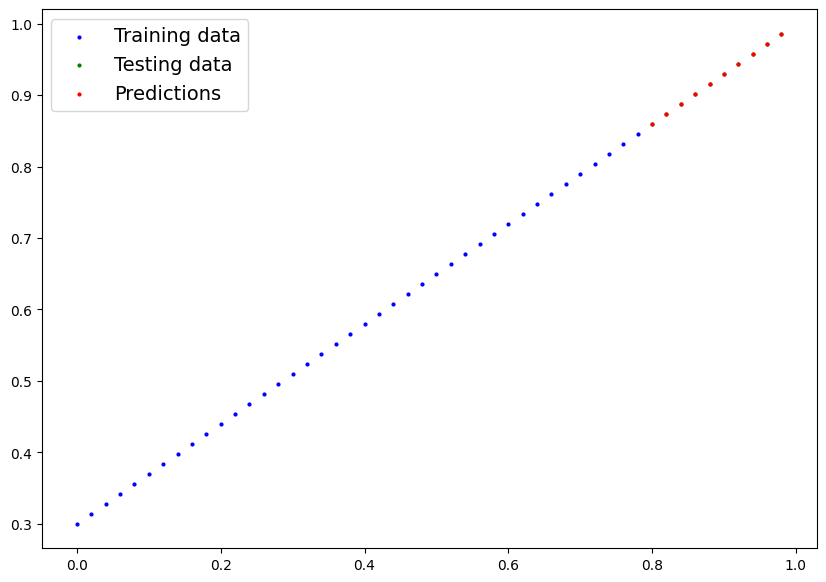

In [77]:
plot_predictions(
    train_data= X_train.cpu(),
    train_labels= y_train.cpu(),
    test_data= X_test.cpu(),
    test_labels= y_test.cpu(),
    predictions=y_preds.cpu()
)

Daha önce 100 epoch ile yaptığımız tahminlerde kırmızı noktalar yeşillere yakındı ama tam üstünde değildi. 1000 epoch'a çıkmak, modelin o ince detayları (0.7 ve 0.3 değerlerini) tam olarak yakalamasını sağladı.

`.cpu() çevirme gerekliliği : ` Grafik çizdirmek için kullandığımız matplotlib veya NumPy gibi kütüphaneler doğrudan GPU verileriyle çalışamaz; verinin işlemci (CPU) hafızasında olmasını beklerler. .cpu() komutuyla, verinin bir kopyasını ekran kartından alıp tekrar işlemciye (CPU) kopyalıyoruz ki görselleştirme fonksiyonu bu veriyi okuyabilsin.

Şimdi de modeli kaydedelim.

In [78]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Model saved path: {MODEL_SAVE_PATH}")
torch.save(
    obj = model_1.state_dict(),
    f = MODEL_SAVE_PATH
)

Model saved path: models/01_pytorch_workflow_model_1.pth


Şimdi de bu modeli geri yükleyip kullanalım.

In [79]:
loaded_model_1 = LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Loaded model device is : {next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Loaded model device is : cuda:0


Şimdi de tahmin yapalım.

In [83]:
loaded_model_1.eval()

with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)


In [84]:
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

Kaydedip tekrar yüklediğimiz modelin yaptığı tüm tahminler doğru çıktı. Yanında da device olarak cuda ifadesini görüp GPU'da işlem yapıldığını anlamış oluyoruz.